In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# 0.ライブラリのインポート

In [2]:

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pylab as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from scipy.stats import mstats
from tqdm import tqdm

from sklearn import metrics, model_selection, feature_selection, ensemble, gaussian_process, linear_model, naive_bayes, neighbors, svm, tree, discriminant_analysis, model_selection
from xgboost import XGBClassifier
from imblearn import under_sampling, over_sampling


from IPython.display import Image
from io import StringIO

import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd

# 1.データの読み出し


In [29]:
train = pd.read_csv("titanic/train.csv")
test = pd.read_csv("titanic/test.csv")
gender_submission=pd.read_csv("titanic/gender_submission.csv")
data = pd.concat([train, test], sort=True)
data

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
414,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
415,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
416,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309


In [107]:
data[data.Name.str.contains("Spector")]
# import pandas_profiling as pdp


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
413,NaN,NaN,S,8.05,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236


In [63]:
profile = pdp.ProfileReport(pd.concat([X,y],axis=1))
profile.to_file(outputfile="myoutputfile.html")

TypeError: to_file() got an unexpected keyword argument 'outputfile'

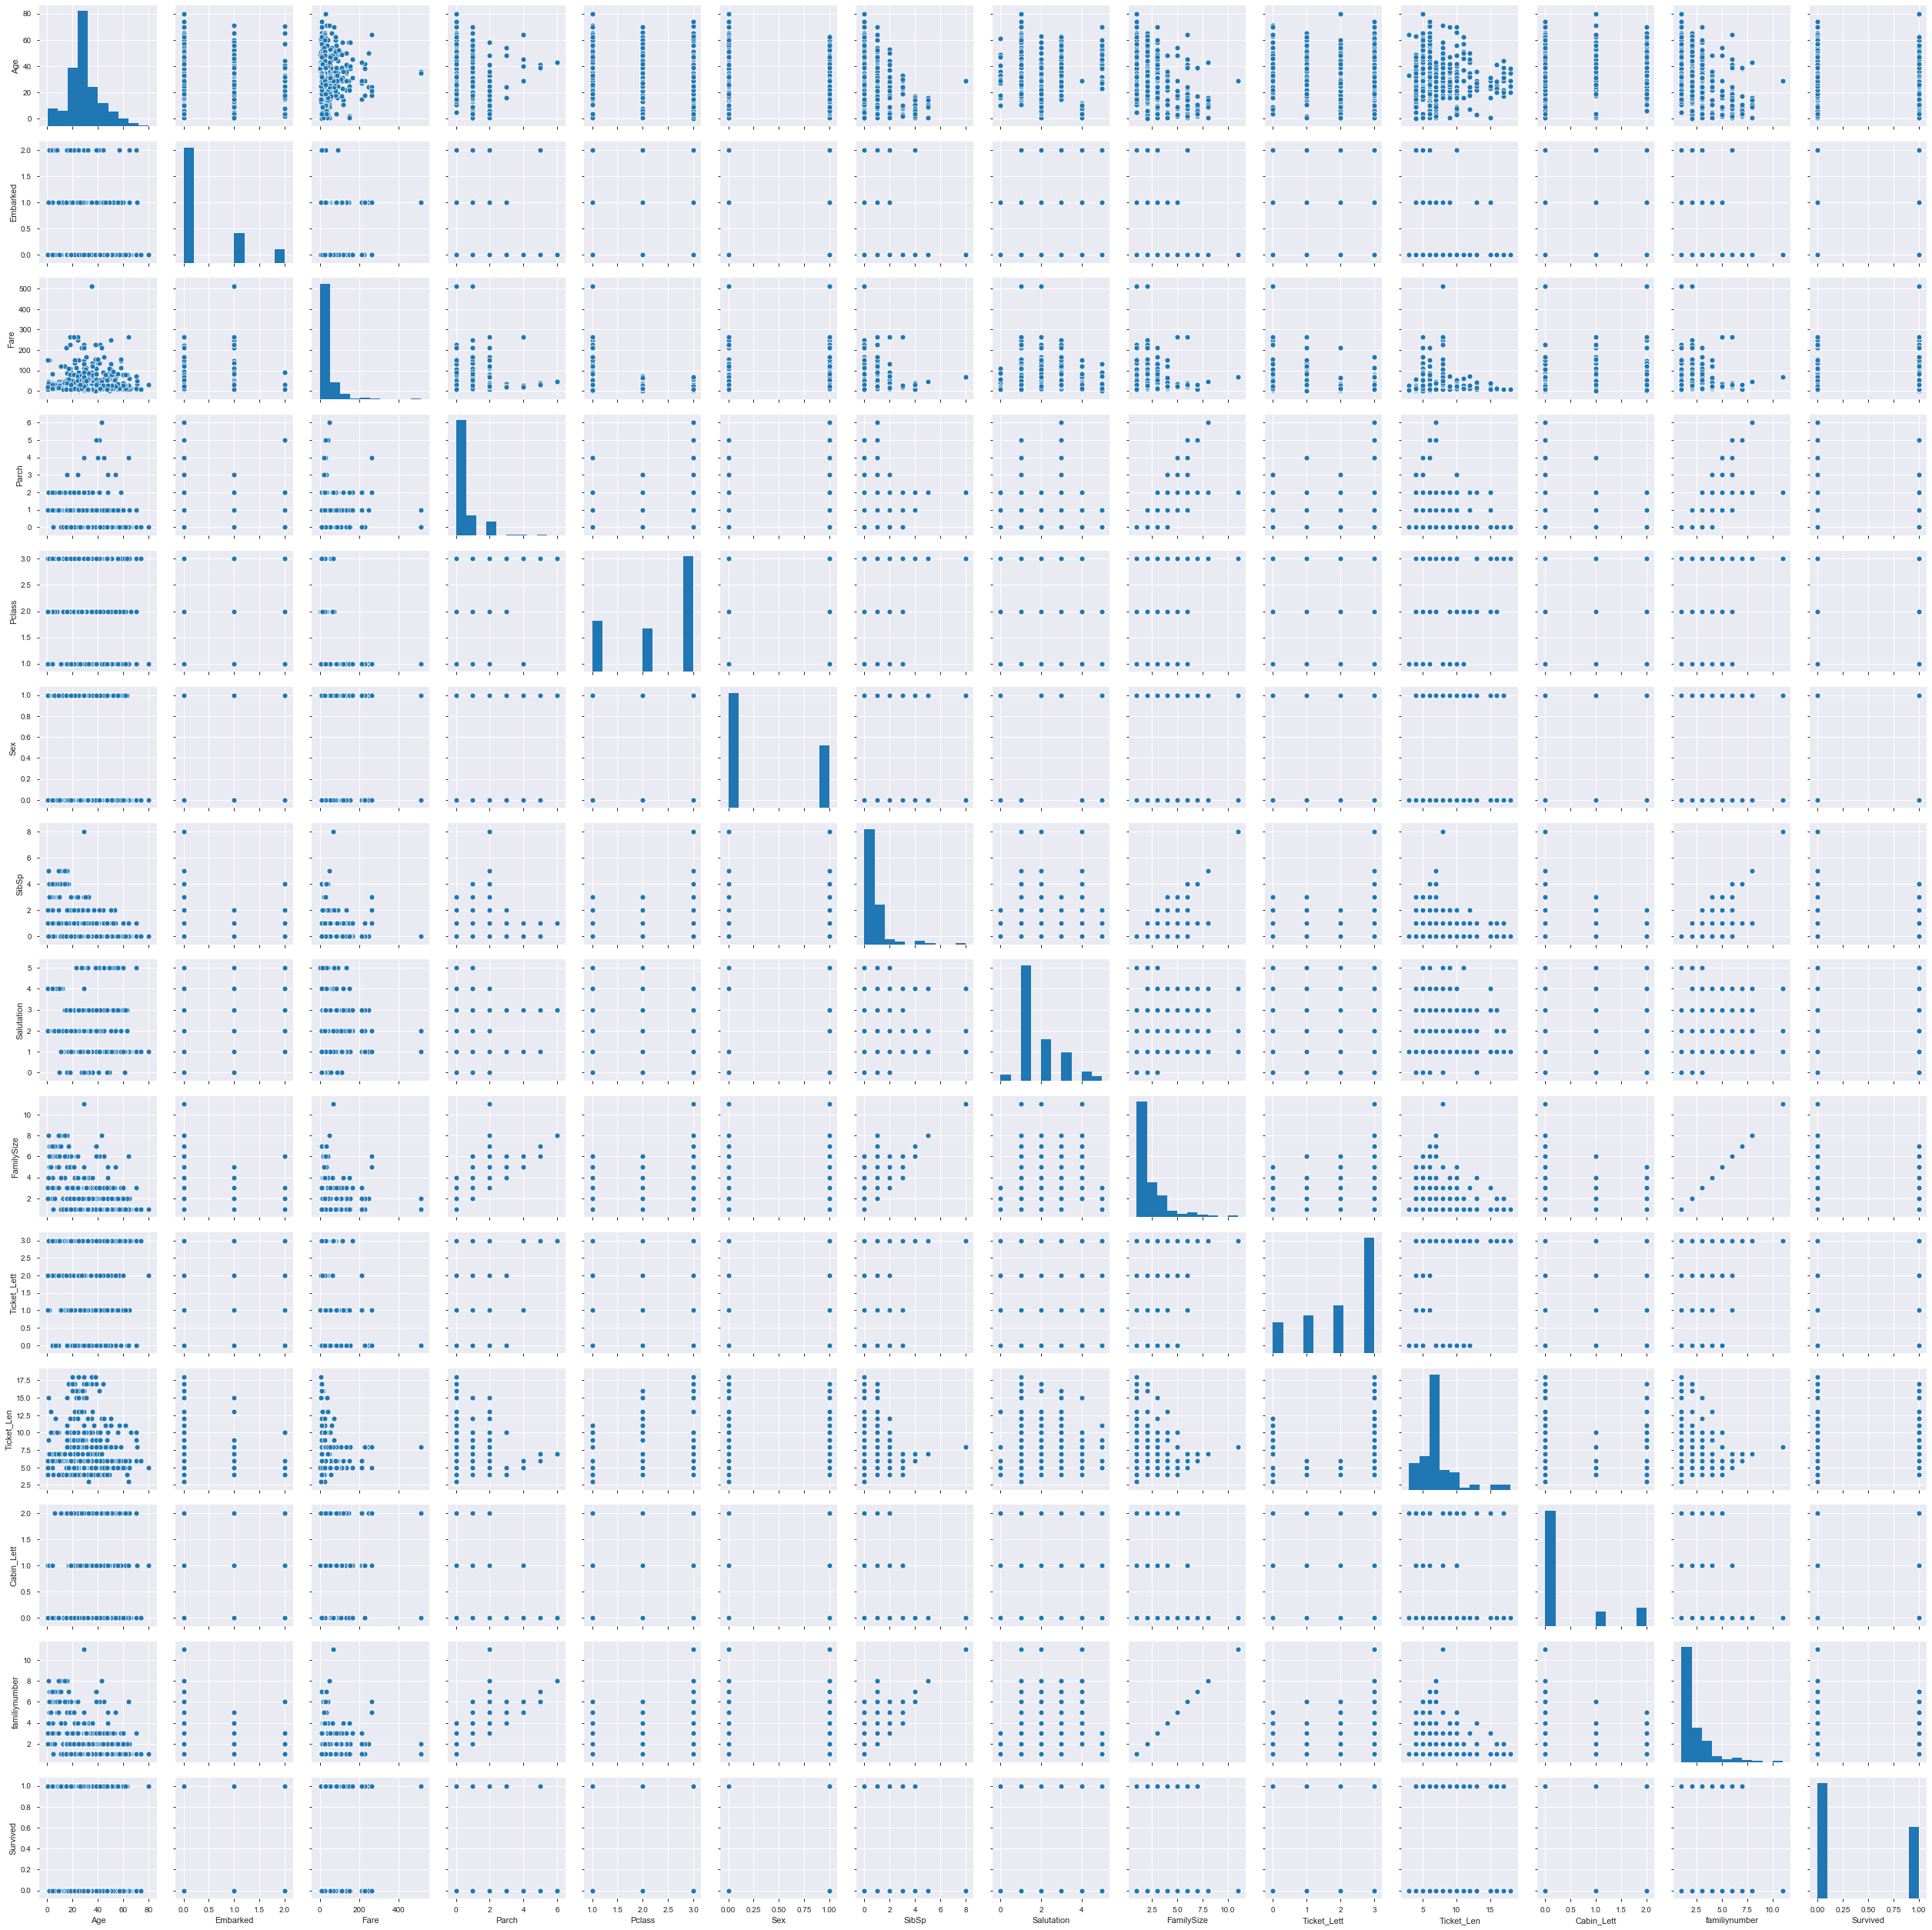

In [69]:
import seaborn as sns
sns.pairplot((pd.concat([X,y],axis=1)))

In [109]:
data.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [59]:
!pip install pandas_profiling

     |████████████████████████████████| 153kB 1.8MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/45/ad/24a16fa4ba612fb96a3c4bb115a5b9741483f53b66d3d3afd987f20fa227/phik-0.9.8-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/64/dc/6f35f114844fb12e38d60c4f3d2441a55baff7043ad4e013777dff55746c/pytest_pylint-0.14.1-py3-none-any.whl
     |████████████████████████████████| 2.0MB 11.4MB/s eta 0:00:01
     |████████████████████████████████| 235kB 6.6MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/e9/59/43fc36c5ee316bb9aeb7cf5329cdbdca89e5749c34d5602753827c0aa2dc/pylint-2.4.4-py3-none-any.whl
     |████████████████████████████████| 15.9MB 892kB/s eta 0:00:01    |██                              | 972kB 9.8MB/s eta 0:00:02     |████                            | 1.9MB 9.8MB/s eta 0:00:02     |█████████████████████████▍      | 12.6MB 6.2MB/s eta 0:00:01
     |████████████████████████████████| 92kB 3.4MB/s eta 0:00:011
  Created w

# 2.特徴量設計

In [112]:
def preprocess():
    train = pd.read_csv("titanic/train.csv")
    test = pd.read_csv("titanic/test.csv")
    gender_submission = pd.read_csv("titanic/gender_submission.csv")
    data = pd.concat([train, test], sort=True)

#     data["null_num"]=data.isnull().sum(axis=1)

    # 欠損値処理
    data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
#     data['Mr']=data.Name.map(lambda x:1 if "Mr" in x else 0)
# #     data['Ms']=data.Name.map(lambda x:1 if ("Ms"or"Miss") in x else 0)
#     data['Dr']=data.Name.map(lambda x:1 if "Dr" in x else 0)
# #     data['Master']=data.Name.map(lambda x:1 if "Master" in x else 0)

#     data["child"] = data.Age.map(lambda x: 1 if x<10 else 0)

    data['Embarked'].fillna(('S'), inplace=True)
    data['Embarked'] = data['Embarked'].map(
        {'S': 0, 'C': 1, 'Q': 2}).astype(int)
    data['Fare'].fillna(np.mean(data['Fare']), inplace=True)
    # data['Mr']=data.Name.apply(lambda x:1 if 'Mr' in x else 0)
    # data['Mrs']=data.Name.apply(lambda x:1 if 'Mrs' in x else 0)
    # data['Miss']=data.Name.apply(lambda x:1 if 'Miss' in x else 0)
    age_avg = data['Age'].mean()

    data['Age'].fillna(int(age_avg), inplace=True)

    delete_columns = ['PassengerId', ]
    data.drop(delete_columns, axis=1, inplace=True)

    data['Salutation'] = data.Name.str.extract(' ([A-Za-z]+).', expand=False)
    data['Salutation'] = data['Salutation'].replace(
        ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    data['Salutation'] = data['Salutation'].replace('Mlle', 'Miss')
    data['Salutation'] = data['Salutation'].replace('Ms', 'Miss')
    data['Salutation'] = data['Salutation'].replace('Mme', 'Mrs')
    del data['Name']
    Salutation_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

    data["FamilySize"] = data["SibSp"] + data["Parch"] + 1

    data['Salutation'] = data['Salutation'].map(Salutation_mapping)
    data['Salutation'] = data['Salutation'].fillna(0)
    data = pd.get_dummies(data, drop_first=True, columns=['Salutation'])
#     data=pd.get_dummies(data, drop_first=True, columns=['Embarked'])

    data['Ticket_Lett'] = data['Ticket'].apply(lambda x: str(x)[0])
    data['Ticket_Lett'] = data['Ticket_Lett'].apply(lambda x: str(x))
    data['Ticket_Lett'] = np.where((data['Ticket_Lett']).isin(['1', '2', '3', 'S', 'P', 'C', 'A']), data['Ticket_Lett'], np.where(
        (data['Ticket_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']), '0', '0'))
    data['Ticket_Len'] = data['Ticket'].apply(lambda x: len(x))
    del data['Ticket']
    data['Ticket_Lett'] = data['Ticket_Lett'].replace("1", 1).replace("2", 2).replace(
        "3", 3).replace("0", 0).replace("S", 3).replace("P", 0).replace("C", 3).replace("A", 3)

    data = pd.get_dummies(data, drop_first=True, columns=['Ticket_Lett'])

#     data=pd.get_dummies(data, drop_first=True, columns=['Ticket_Len'])

    data['Cabin_Lett'] = data['Cabin'].apply(lambda x: str(x)[0])
    data['Cabin_Lett'] = data['Cabin_Lett'].apply(lambda x: str(x))
    data['Cabin_Lett'] = np.where((data['Cabin_Lett']).isin(['F', 'E', 'D', 'C', 'B', 'A']), data['Cabin_Lett'], np.where(
        (data['Cabin_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']), '0', '0'))
    del data['Cabin']
#     data["familiynumber"]=data.Parch+data.SibSp+1
    data['Cabin_Lett'] = data['Cabin_Lett'].replace("A", 1).replace("B", 2).replace(
        "C", 1).replace("0", 0).replace("D", 2).replace("E", 2).replace("F", 1)

#     data=pd.get_dummies(data, drop_first=True, columns=['Cabin_Lett'])

    train = data.dropna()
    test = data[data.Survived.isnull()]
    test = test.drop(["Survived", ], axis=1)
    X = train.drop(["Survived"], axis=1)
    y = train.Survived

    return X, y, test


X, y, test = preprocess()

In [113]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import lightgbm as lgb
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
model=lgb.LGBMClassifier()
scores = []
kf = KFold(n_splits=5, shuffle=True, random_state=0)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    scores.append(f1_score(y_pred, y_test))
print(scores)
print(np.array(scores).mean())

[0.8031496062992126, 0.7244094488188977, 0.7768595041322314, 0.7794117647058824, 0.7919463087248322]
0.7751553265362112


In [91]:
train = data[:len(train)]
test = data[len(train):]

In [11]:
y_train = train['Survived']
X_train = train.drop('Survived', axis = 1)
X_test = test.drop('Survived', axis = 1)

In [12]:
#生存者の割合
train.Survived.sum()/train.Survived.count()
#まぁ均衡ということでいいかも、一応　データの整形を行う


0.3838383838383838

In [13]:
from imblearn import under_sampling, over_sampling
cols = train.columns.tolist()
cols.remove('Survived')

positive_cnt = int(train['Survived'].sum())
rus = under_sampling.RandomUnderSampler(sampling_strategy={0:positive_cnt, 1:positive_cnt}, random_state=0)
data_x_sample, data_y_sample  = rus.fit_sample(train[cols], train[['Survived']])


In [14]:
data_x_sample

array([[25.    ,  0.    , 13.    , ...,  3.    , 10.    ,  0.    ],
       [33.    ,  0.    ,  7.775 , ...,  3.    ,  6.    ,  0.    ],
       [42.    ,  0.    , 13.    , ...,  2.    ,  6.    ,  0.    ],
       ...,
       [39.    ,  0.    , 79.65  , ...,  1.    ,  6.    ,  2.    ],
       [25.    ,  0.    , 30.    , ...,  2.    ,  6.    ,  0.    ],
       [ 4.    ,  0.    , 11.1333, ...,  3.    ,  6.    ,  0.    ]])

100%|██████████| 6/6 [00:05<00:00,  1.12it/s]


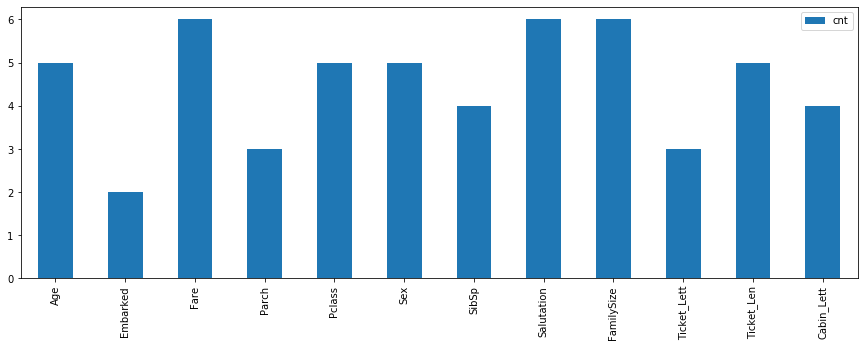

In [15]:
#recvを用いて特徴量選択を行う
feature_importance_models = [
    ensemble.AdaBoostClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    tree.DecisionTreeClassifier(),
    XGBClassifier()
]
 
scoring = ['accuracy']
df_rfe_cols_cnt = pd.DataFrame(columns=['cnt'], index=cols)
df_rfe_cols_cnt['cnt'] = 0
 
for i, model in tqdm(enumerate(feature_importance_models), total=len(feature_importance_models)):
    
    rfe = feature_selection.RFECV(model, step=3)
    rfe.fit(data_x_sample, data_y_sample)
    rfe_cols = train[cols].columns.values[rfe.get_support()]
    df_rfe_cols_cnt.loc[rfe_cols, 'cnt'] += 1
    
df_rfe_cols_cnt.plot(kind='bar', figsize=(15, 5))
plt.show()
#まぁまぁどのパラメーターも効いている。家族総数のパラメータを追加してみる

In [16]:
data["familiynumber"]=data.Parch+data.SibSp+1

In [17]:
data

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,Salutation,FamilySize,Ticket_Lett,Ticket_Len,Cabin_Lett,familiynumber
0,22.0,0,7.2500,0,3,0,1,0.0,1.0,2,3,9,0,2
1,38.0,1,71.2833,0,1,1,1,1.0,3.0,2,0,8,1,2
2,26.0,0,7.9250,0,3,1,0,1.0,2.0,1,3,16,0,1
3,35.0,0,53.1000,0,1,1,1,1.0,3.0,2,1,6,1,2
4,35.0,0,8.0500,0,3,0,0,0.0,1.0,1,3,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,29.0,0,8.0500,0,3,0,0,NaN,1.0,1,3,9,0,1
414,39.0,1,108.9000,0,1,1,0,NaN,0.0,1,0,8,1,1
415,38.5,0,7.2500,0,3,0,0,NaN,1.0,1,3,18,0,1
416,29.0,0,8.0500,0,3,0,0,NaN,1.0,1,3,6,0,1


100%|██████████| 6/6 [00:06<00:00,  1.12s/it]


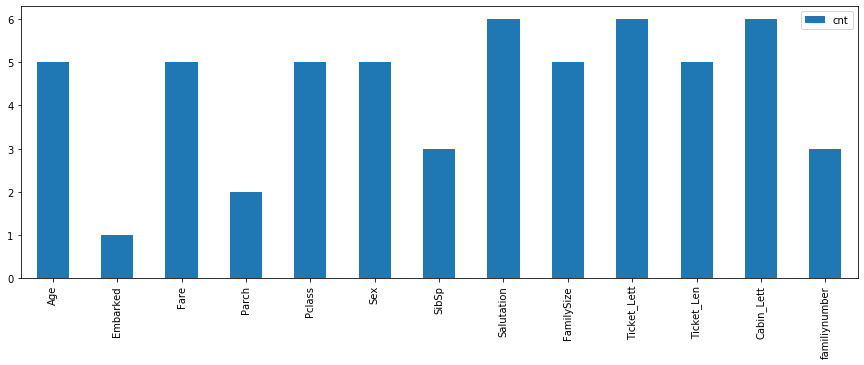

In [18]:
#Familiynumberを設けてrecvを行う

train = data[:len(train)]
test = data[len(train):]
y_train = train['Survived']
X_train = train.drop('Survived', axis = 1)
X_test = test.drop('Survived', axis = 1)

cols = train.columns.tolist()
cols.remove('Survived')

positive_cnt = int(train['Survived'].sum())
rus = under_sampling.RandomUnderSampler(sampling_strategy={0:positive_cnt, 1:positive_cnt}, random_state=0)
data_x_sample, data_y_sample  = rus.fit_sample(train[cols], train[['Survived']])
#recvを用いて特徴量選択を行う
feature_importance_models = [
    ensemble.AdaBoostClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    tree.DecisionTreeClassifier(),
    XGBClassifier()
]
 
scoring = ['accuracy']
df_rfe_cols_cnt = pd.DataFrame(columns=['cnt'], index=cols)
df_rfe_cols_cnt['cnt'] = 0
 
for i, model in tqdm(enumerate(feature_importance_models), total=len(feature_importance_models)):
    
    rfe = feature_selection.RFECV(model, step=3)
    rfe.fit(data_x_sample, data_y_sample)
    rfe_cols = train[cols].columns.values[rfe.get_support()]
    df_rfe_cols_cnt.loc[rfe_cols, 'cnt'] += 1
    
df_rfe_cols_cnt.plot(kind='bar', figsize=(15, 5))
plt.show()
#家族の数を追加したところ、Parch,SibSpの重要度が減少した。

In [ ]:
# #Embarked,Parch,SibSpを除いてモデル選択を行う場合はこちらのコメントアウトを外す。今回は多い特徴量で検討
# x_cols = df_rfe_cols_cnt[df_rfe_cols_cnt['cnt'] >= 4].index
# x_cols

In [ ]:
#Embarked,Parch,SibSpを除かずモデル選択を行う
x_cols = df_rfe_cols_cnt.index
x_cols

In [ ]:
positive_cnt = int(train.Survived.sum())
rus = under_sampling.RandomUnderSampler(sampling_strategy={0:positive_cnt, 1:positive_cnt}, random_state=0)
data_x_sample, data_y_sample = rus.fit_sample(train[x_cols], train[['Survived']])

len(data_x_sample), len(data_y_sample), data.Survived.sum()

# 3.モデル設計,評価

In [ ]:
# 特徴量を選択して、複数のモデルで精度を調査する
import lightgbm as lgb
 
models = [
 
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
 
    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.RidgeClassifierCV(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
 
    #xgboost
    XGBClassifier(),
    lgb.LGBMClassifier()    
]
 
df_compare = pd.DataFrame(columns=['name', 'train_accuracy', 'valid_accuracy', 'time'])
scoring = ['accuracy']
 
for model in tqdm(models):
    
    name = model.__class__.__name__
    
    cv_rlts = model_selection.cross_validate(model, data_x_sample, data_y_sample, scoring=scoring, cv=10, return_train_score=True)
 
    for i in range(10):
        s = pd.Series([name, cv_rlts['train_accuracy'][i], cv_rlts['test_accuracy'][i], cv_rlts['fit_time'][i]], index=df_compare.columns, name=name+str(i))
        df_compare = df_compare.append(s)
        
plt.figure(figsize=(12,8))
sns.boxplot(data=df_compare, y='name', x='valid_accuracy', orient='h', linewidth=0.5, width=0.5)
plt.grid()
plt.show()


ぱっと見ABC,BC,ETSC,GBC,RFC,XGB,LRBC,LGBMあたりが良さそう

In [ ]:
# 精度の良いモデルを選んで、投票モデルを学習
 
vote_models = [
 
    #Ensemble Methods
    ('abc', ensemble.AdaBoostClassifier()),
    ('bc', ensemble.BaggingClassifier()),
    ('etsc', ensemble.ExtraTreesClassifier()),
    ('gbc', ensemble.GradientBoostingClassifier()),
    ('rfc', ensemble.RandomForestClassifier()),
 
    #Gaussian Processes
    #('gpc', gaussian_process.GaussianProcessClassifier()),
    
    #GLM
    ('lrcv', linear_model.LogisticRegressionCV()),
    #('rccv', linear_model.RidgeClassifierCV()), # unable soft voting
    
    #Navies Bayes
    #('bnb', naive_bayes.BernoulliNB()),
    #('gnb', naive_bayes.GaussianNB()),
    
    #Nearest Neighbor
    #('knc', neighbors.KNeighborsClassifier()),
    
    #Trees    
    #('dtc', tree.DecisionTreeClassifier()),
    #('etc', tree.ExtraTreeClassifier()),
    
    #Discriminant Analysis
    #('lda', discriminant_analysis.LinearDiscriminantAnalysis()),
    #('qda', discriminant_analysis.QuadraticDiscriminantAnalysis()),
 
    #xgboost
    ('xgbc', XGBClassifier()),
    
    #lightgbm
    ('lgbm',lgb.LGBMClassifier())
    
]
 
df_compare = pd.DataFrame(columns=['name', 'valid_accuracy', 'time'])
scoring = ['accuracy']
 
vote_hard_model = ensemble.VotingClassifier(estimators=vote_models, voting='hard')
cv_rlts = model_selection.cross_validate(vote_hard_model, data_x_sample, data_y_sample, cv=10, scoring=scoring)
for i in range(10):
    s = pd.Series(['hard', cv_rlts['test_accuracy'][i], cv_rlts['fit_time'][i]], index=df_compare.columns, name='hard'+str(i))
    df_compare = df_compare.append(s)
    
vote_soft_model = ensemble.VotingClassifier(estimators=vote_models , voting='soft')
cv_rlts = model_selection.cross_validate(vote_soft_model, data_x_sample, data_y_sample, cv=10, scoring=scoring)
for i in range(10):
    s = pd.Series(['soft', cv_rlts['test_accuracy'][i], cv_rlts['fit_time'][i]], index=df_compare.columns, name='soft'+str(i))
    df_compare = df_compare.append(s)
    
plt.figure(figsize=(12,3))
sns.boxplot(data=df_compare, y='name', x='valid_accuracy', orient='h', linewidth=0.5, width=0.5)
plt.grid()
plt.show()

In [ ]:

# 各モデルのハイパーパラメータをグリッドサーチ

grid_n_estimator = [10, 50, 100, 300]
grid_ratio = [.1, .25, .5, .75, 1.0]
grid_learn = [.01, .03, .05, .1, .25]
grid_max_depth = [2, 4, 6, 8, 10, None]
grid_min_samples = [5, 10, .03, .05, .10]
grid_criterion = ['gini', 'entropy']
grid_bool = [True, False]
grid_seed = [0]

grid_param = [
    
    #AdaBoostClassifier
    [{ 
        'n_estimators': grid_n_estimator, #default=50
        'learning_rate': grid_learn, #default=1
        #'algorithm': ['SAMME', 'SAMME.R'], #default=’SAMME.R
        'random_state': grid_seed
    }],
    
    #BaggingClassifier
    [{
        'n_estimators': grid_n_estimator, #default=10
        'max_samples': grid_ratio, #default=1.0
        'random_state': grid_seed
     }],

    #ExtraTreesClassifier
    [{
        'n_estimators': grid_n_estimator, #default=10
        'criterion': grid_criterion, #default=”gini”
        'max_depth': grid_max_depth, #default=None
        'random_state': grid_seed
     }],

    #GradientBoostingClassifier
    [{
        #'loss': ['deviance', 'exponential'], #default=’deviance’
        'learning_rate': [.05], #default=0.1
        'n_estimators': [300], #default=100
        #'criterion': ['friedman_mse', 'mse', 'mae'], #default=”friedman_mse”
        'max_depth': grid_max_depth, #default=3   
        'random_state': grid_seed
     }],

    #RandomForestClassifier
    [{
        'n_estimators': grid_n_estimator, #default=10
        'criterion': grid_criterion, #default=”gini”
        'max_depth': grid_max_depth, #default=None
        'oob_score': [True], #default=False
        'random_state': grid_seed
     }],
    
    #LogisticRegressionCV
    [{
        'fit_intercept': grid_bool, #default: True
        #'penalty': ['l1','l2'],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], #default: lbfgs
        'random_state': grid_seed
     }],
    
    # ExtraTreeClassifier
    [{}],
    
    # LinearDiscriminantAnalysis
    [{}],
    
    #XGBClassifier
    [{
        'learning_rate': grid_learn, #default: .3
        'max_depth': [1,2,4,6,8,10], #default 2
        'n_estimators': grid_n_estimator, 
        'seed': grid_seed  
     }],
    #LGBMClassifier
    [{
        'learning_rate':grid_learn,
        'n_estimators':grid_n_estimator,
        'max_depth':[1,2,4,6,8,10],
        'min_child_weight':[0.5,1,2],
        'min_child_samples':[5,10,20],
        'subsample':[0.8],
        'colsample_bytree':[0.8],
        'verbose':[-1],
        'num_leaves':[80]}]
    
]

for model, param in tqdm(zip(vote_models, grid_param), total=len(vote_models)):
    
    best_search = model_selection.GridSearchCV(estimator=model[1], param_grid=param, scoring='roc_auc')
    best_search.fit(data_x_sample, data_y_sample)

    best_param = best_search.best_params_
    model[1].set_params(**best_param)

In [ ]:
#　投票モデルの作成、softモデルとhardモデルの作成と検証
df_compare = pd.DataFrame(columns=['name', 'valid_accuracy', 'time'])
scoring = ['accuracy']
 
vote_hard_model = ensemble.VotingClassifier(estimators=vote_models, voting='hard')
cv_rlts = model_selection.cross_validate(vote_hard_model, data_x_sample, data_y_sample, cv=10, scoring=scoring)
for i in range(10):
    s = pd.Series(['hard',  cv_rlts['test_accuracy'][i], cv_rlts['fit_time'][i]], index=df_compare.columns, name='hard'+str(i))
    df_compare = df_compare.append(s)
    
vote_soft_model= ensemble.VotingClassifier(estimators=vote_models , voting='soft')
cv_rlts = model_selection.cross_validate(vote_soft_model, data_x_sample, data_y_sample, cv=10, scoring=scoring)
for i in range(10):
    s = pd.Series(['soft',  cv_rlts['test_accuracy'][i], cv_rlts['fit_time'][i]], index=df_compare.columns, name='soft'+str(i))
    df_compare = df_compare.append(s)
    
plt.figure(figsize=(12,3))
sns.boxplot(data=df_compare, y='name', x='valid_accuracy', orient='h',  linewidth=0.5, width=0.5)
plt.grid()
plt.show()

In [ ]:
df_compare.groupby('name').mean().sort_values(by='valid_accuracy', ascending=False)


あんまりsoftもhardも変わらない。以下は均衡データを使って混合行列の作成


In [ ]:
from sklearn.model_selection import KFold, train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(data_x_sample, data_y_sample, test_size=0.3, random_state=0)

vote_soft_model.fit(train_x, train_y)

pred = vote_soft_model.predict(valid_x)

fig, axs = plt.subplots(ncols=2,figsize=(15,5))

sns.heatmap(metrics.confusion_matrix(valid_y, pred), vmin=0, annot=True, fmt='d', ax=axs[0])
axs[0].set_xlabel('Predict')
axs[0].set_ylabel('Ground Truth')
axs[0].set_title('Accuracy: {}'.format(metrics.accuracy_score(valid_y, pred)))
fpr, tpr, thresholds = metrics.roc_curve(valid_y, pred)
axs[1].plot(fpr, tpr)
axs[1].set_title('ROC curve')
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].grid(True)
plt.show()

In [ ]:
vote_hard_model.fit(train_x, train_y)

pred = vote_hard_model.predict(valid_x)

fig, axs = plt.subplots(ncols=2,figsize=(15,5))

sns.heatmap(metrics.confusion_matrix(valid_y, pred), vmin=0, annot=True, fmt='d', ax=axs[0])
axs[0].set_xlabel('Predict')
axs[0].set_ylabel('Ground Truth')
axs[0].set_title('Accuracy: {}'.format(metrics.accuracy_score(valid_y, pred)))
fpr, tpr, thresholds = metrics.roc_curve(valid_y, pred)
axs[1].plot(fpr, tpr)
axs[1].set_title('ROC curve')
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].grid(True)
plt.show()

In [ ]:

# 動かすパラメータを明示的に表示
params = {"learning_rate":[0.1,0.3,0.5],
        "max_depth": [2,3,5,10],
         "subsample":[0.5,0.8,0.9,1],
         "colsample_bytree": [0.5,1.0],
         }
# モデルにインスタンス生成
mod = XGBClassifier()
# ハイパーパラメータ探索
gv =  model_selection.GridSearchCV(mod, params, cv = 10, scoring= 'roc_auc', n_jobs =-1)

#　trainデータとtestデータに分割
train_x, valid_x, train_y, valid_y = train_test_split(data_x_sample, data_y_sample, test_size=0.3, random_state=0)


# 予測モデルを作成
gv.fit(train_x,train_y)



In [ ]:
gv =  model_selection.GridSearchCV(mod, params, cv = 10, scoring= 'roc_auc', n_jobs =-1)
cv_rlts = model_selection.cross_validate(gv, data_x_sample, data_y_sample, cv=10, scoring=scoring)
for i in range(10):
    s = pd.Series(['xgboost',  cv_rlts['test_accuracy'][i], cv_rlts['fit_time'][i]], index=df_compare.columns, name='xgb'+str(i))
    df_compare = df_compare.append(s)
    
plt.figure(figsize=(12,3))
sns.boxplot(data=df_compare, y='name', x='valid_accuracy', orient='h',  linewidth=0.5, width=0.5)
plt.grid()
plt.show()


In [ ]:
train_x, valid_x, train_y, valid_y = train_test_split(data_x_sample, data_y_sample, test_size=0.3, random_state=0)

gv.fit(train_x, train_y)

pred = gv.predict(valid_x)

fig, axs = plt.subplots(ncols=2,figsize=(15,5))

sns.heatmap(metrics.confusion_matrix(valid_y, pred), vmin=0, annot=True, fmt='d', ax=axs[0])
axs[0].set_xlabel('Predict')
axs[0].set_ylabel('Ground Truth')
axs[0].set_title('Accuracy: {}'.format(metrics.accuracy_score(valid_y, pred)))
fpr, tpr, thresholds = metrics.roc_curve(valid_y, pred)
axs[1].plot(fpr, tpr)
axs[1].set_title('ROC curve')
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].grid(True)
plt.show()

softの方がややいい感じがするので、softの投票モデルで提出


# 4.モデル提出

In [ ]:
X_test.isnull().sum()

In [ ]:
#最初はモデル評価のために均衡データの作成を行い、そのデータを分割しモデルの評価を行なった
#提出するモデルは訓練データを全て使い学習する。データ数多い方が精度良くなりそうだし。
from sklearn.model_selection import KFold, train_test_split
# train_x, valid_x, train_y, valid_y = train_test_split(data_x_sample, data_y_sample, test_size=0.3, random_state=0)

vote_soft_model.fit(X_train, y_train)

pred = vote_soft_model.predict(X_test)



In [ ]:
sub = pd.DataFrame(pd.read_csv("/kaggle/input/titanic/test.csv")['PassengerId'])
sub['Survived'] = list(map(int, pred))
sub.to_csv("submission.csv", index = False)